In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

In [2]:
mri_file = "image.nii.gz"
img = nib.load(mri_file)

In [3]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [4]:
img.shape

(197, 233, 189)

In [5]:
hdr = img.header
hdr

In [6]:
hdr.get_zooms()

(1.0, 1.0, 1.0)

In [7]:
hdr.get_xyzt_units()

('mm', 'sec')

In [8]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)
data = img_data

<class 'numpy.ndarray'>
(197, 233, 189)


In [9]:
print(img_data)

[[[1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  ...
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]]

 [[1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  ...
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]]

 [[1.17791295 1.17791295 1.17791295 ... 1.17791295 1.17791295 1.17791295]
  [1.17791295 1.177912

In [10]:
mid_vox = img_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[ 9.42452431 10.3591404  11.32674313]
  [ 8.64384556 10.24918556 10.30416298]
  [ 7.13746452  9.07266903  9.80936623]]

 [[11.35972881 12.6242094  12.77814674]
  [10.01828003 11.26076984 10.95289612]
  [ 7.87416172  9.31456947  9.98529434]]

 [[14.22955036 14.3395052  13.51484394]
  [12.66819191 13.1519928  13.21796608]
  [10.57905006 11.23877907 11.70058918]]]


In [11]:
mid_slice_x = img_data[100, :, :]
print(mid_slice_x.shape)

(233, 189)


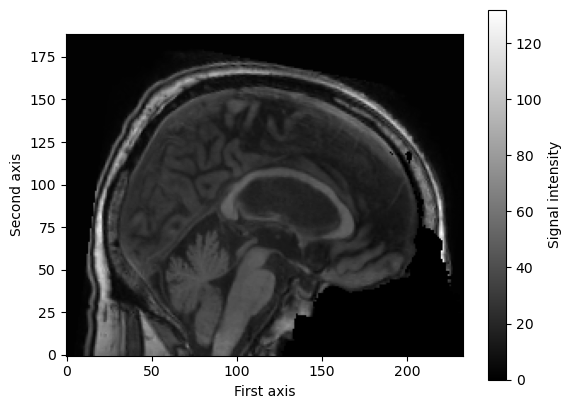

In [12]:
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

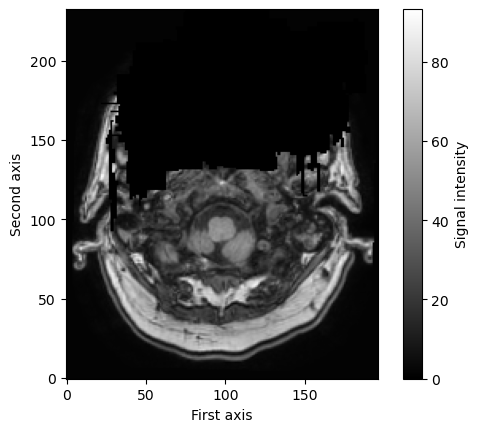

In [13]:
second_slice = img_data[:, :, 10]
plt.imshow(second_slice.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [25]:
from ipywidgets import interact, IntSlider

# Function to display slice with sliders for X, Y, and Z dimensions
def display_slices(x_idx, y_idx, z_idx):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display slice along X-axis
    axes[0].imshow(data[x_idx, :, :].T, cmap='gray', origin='lower')
    axes[0].set_xlabel('Y-axis')
    axes[0].set_ylabel('Z-axis')
    axes[0].set_title(f'X-slice: {x_idx}')
    axes[0].set_aspect('equal')

    # Display slice along Y-axis
    axes[1].imshow(data[:, y_idx, :].T, cmap='gray', origin='lower')
    axes[1].set_xlabel('X-axis')
    axes[1].set_ylabel('Z-axis')
    axes[1].set_title(f'Y-slice: {y_idx}')
    axes[1].set_aspect('equal')

    # Display slice along Z-axis
    axes[2].imshow(data[:, :, z_idx].T, cmap='gray', origin='lower')
    axes[2].set_xlabel('X-axis')
    axes[2].set_ylabel('Y-axis')
    axes[2].set_title(f'Z-slice: {z_idx}')
    axes[2].set_aspect('equal')

    plt.tight_layout()
    plt.show()

# Determine the number of slices along each dimension
num_slices_x = data.shape[0]
num_slices_y = data.shape[1]
num_slices_z = data.shape[2]

# Create sliders for X, Y, and Z dimensions
slider_x = IntSlider(min=0, max=num_slices_x-1, step=1, value=num_slices_x//2, description='X Index')
slider_y = IntSlider(min=0, max=num_slices_y-1, step=1, value=num_slices_y//2, description='Y Index')
slider_z = IntSlider(min=0, max=num_slices_z-1, step=1, value=num_slices_z//2, description='Z Index')

# Display interactive plot with sliders
interact(display_slices, x_idx=slider_x, y_idx=slider_y, z_idx=slider_z)

interactive(children=(IntSlider(value=98, description='X Index', max=196), IntSlider(value=116, description='Y…

<function __main__.display_slices(x_idx, y_idx, z_idx)>

In [15]:
# # Load NIfTI images
# nii_img1 = nib.load('image_.nii')
# nii_img2 = nib.load('image2.nii')

# # Extract data from NIfTI images
# data1 = nii_img1.get_fdata()
# data2 = nii_img2.get_fdata()

# # Create HDF5 file
# with h5py.File('multi_nifti.h5', 'w') as hf:
#     # Store NIfTI datasets
#     hf.create_dataset('image1', data=data1)
#     hf.create_dataset('image2', data=data2)

In [16]:
# def combine_nifti_to_hdf5(nifti_files, h5_file_path):
#     # Load data from each NIfTI file into NumPy arrays
#     nifti_data = [nib.load(nii_file).get_fdata() for nii_file in nifti_files]

#     # Combine data along a new axis (assuming they have the same shape)
#     combined_data = np.stack(nifti_data, axis=-1)

#     # Save combined data as a dataset in an HDF5 file
#     with h5py.File(h5_file_path, 'w') as hf:
#         hf.create_dataset('combined_data', data=combined_data)

# # Example usage
# nifti_files = ['image.nii.gz', 'mask.nii.gz']  # List of NIfTI file paths
# h5_file_path = 'combined_data.h5'  # Output HDF5 file path

# combine_nifti_to_hdf5(nifti_files, h5_file_path)